# Dataset Upload

In addition to creating and editing Datasets in the LangSmith UI, you can also create and edit datasets with the LangSmith SDK.

Let's go ahead an upload a list of examples that we have from our RAG application to LangSmith as a new dataset.

In [ ]:
# You can set them inline
import os
os.environ["OPENAI_API_KEY"] = ""
os.environ["LANGSMITH_API_KEY"] = ""
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langsmith-academy"

In [ ]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="C:/Users/Lenovo/Documents/code/mat496/.env", override=True)
import os


In [5]:
from langsmith import Client

example_inputs = [
    ("What is The Lord of the Rings about?", "The Lord of the Rings is an epic fantasy trilogy about a hobbit named Frodo who must destroy a powerful ring to save Middle-earth from the dark lord Sauron. The story follows his journey with a fellowship of companions across dangerous lands. It explores themes of friendship, courage, and the corrupting nature of power."),
    ("Who wrote The Name of the Wind?", "The Name of the Wind was written by Patrick Rothfuss. It's the first book in The Kingkiller Chronicle series, following the story of Kvothe, a legendary figure recounting his past. The book was published in 2007 and became a bestseller."),
    ("What makes Brandon Sanderson's magic systems unique?", "Brandon Sanderson is known for creating hard magic systems with clear rules and limitations. His magic systems are logical and internally consistent, allowing readers to understand and predict how magic works. Examples include Allomancy in Mistborn and Stormlight in The Stormlight Archive."),
    ("What is the Wheel of Time series about?", "The Wheel of Time is a 14-book epic fantasy series by Robert Jordan, completed by Brandon Sanderson. It follows Rand al'Thor and his friends as they navigate a world where the Dark One threatens to break free. The series features complex magic, political intrigue, and an expansive world with diverse cultures."),
    ("What are the major houses in A Song of Ice and Fire?", "The major houses in A Song of Ice and Fire include Stark, Lannister, Targaryen, Baratheon, and Greyjoy. Each house has distinct characteristics, sigils, and words. The series explores their political conflicts and power struggles across the Seven Kingdoms."),
    ("What is the difference between high fantasy and low fantasy?", "High fantasy is set in completely fictional worlds with their own rules and magic systems, like Middle-earth or Roshar. Low fantasy is set in the real world with magical elements added, or has minimal magic. High fantasy typically features epic quests and world-threatening stakes."),
    ("Who are the main characters in The Stormlight Archive?", "The main characters in The Stormlight Archive include Kaladin, a former soldier with depression, Shallan, a scholar with a dark past, and Dalinar, a warlord seeking redemption. Each character has their own flashback book exploring their history. The series is known for its deep character development and mental health representation."),
    ("What is the magic system in Mistborn?", "Mistborn's magic system, called Allomancy, allows users to ingest and burn metals to gain different powers. Each metal provides a specific ability, like enhanced strength or emotional manipulation. Mistborn can burn all metals, while Mistings can only burn one type."),
    ("What makes The Malazan Book of the Fallen challenging to read?", "The Malazan Book of the Fallen is challenging because it starts in medias res with little explanation, features hundreds of characters across multiple continents, and has a complex non-linear timeline. The series doesn't hold the reader's hand and requires careful attention. However, it's praised for its scope, philosophical depth, and payoff."),
    ("What is grimdark fantasy?", "Grimdark fantasy is a subgenre characterized by morally ambiguous characters, graphic violence, and cynical or pessimistic tones. Examples include The First Law trilogy by Joe Abercrombie and The Black Company by Glen Cook. It often subverts traditional fantasy tropes and avoids clear good versus evil narratives."),
]

client = Client()
# Create a new dataset
dataset_name = "high_fantasy_qa"
dataset = client.create_dataset(dataset_name=dataset_name, description="Q&A pairs about high fantasy books and series")

# Prepare inputs and outputs for bulk creation
inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
    inputs=inputs,
    outputs=outputs,
    dataset_id=dataset.id,
)

{'example_ids': ['43cd1b8e-6549-4b1e-9d87-fae475dee4c7',
  '2a2ad072-a808-49b6-b281-4ef8f87efd22',
  '912c596d-ad05-4839-b5ab-267dc105586c',
  'c5c1ca09-4671-431e-a38a-dbd114e9a00a',
  'c6c99c8d-7913-47f0-8463-fe855a1c2cff',
  '8692e05d-5614-448c-bec1-113c1b2e41bf',
  'cf82da64-88b3-4aea-b7ff-795fe2d9468f',
  '27a1bdc2-291c-404e-a084-796faa9a29b8',
  'aea04455-41c0-405e-a92a-5302d79be603',
  '23e2d7f6-8daa-436f-ab70-29b22ed81acb'],
 'count': 10}

## Submitting another Trace

I've moved our RAG application definition to `app.py` so we can quickly import it.

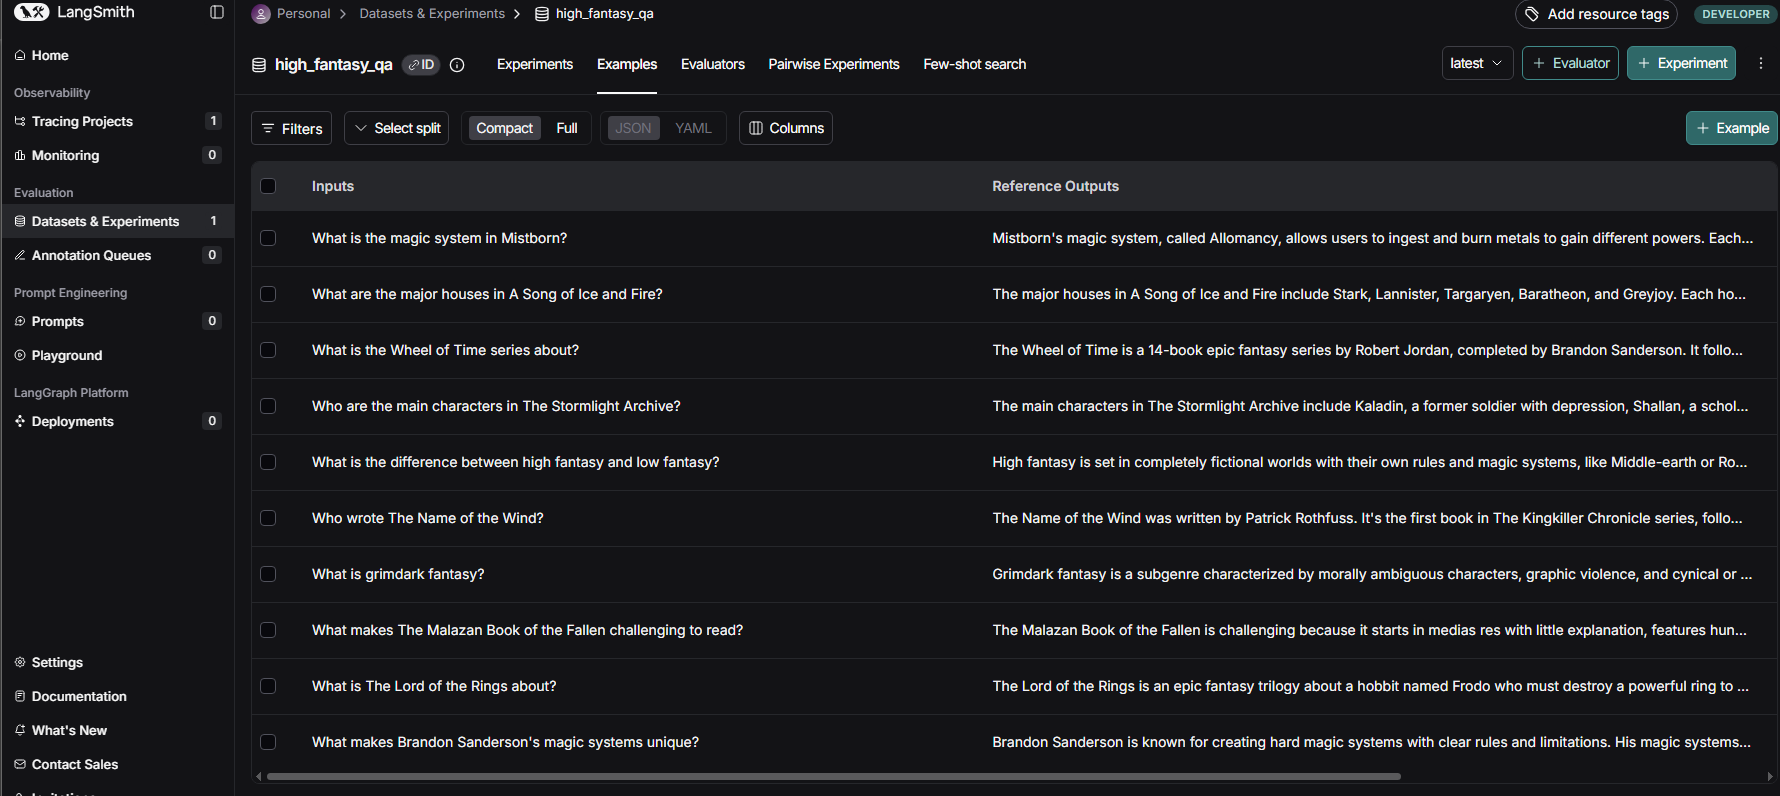
#custom dataset

In [17]:
from langchain_huggingface import HuggingFaceEmbeddings

In [5]:
!pip install langchain-huggingface

  Using cached langchain_huggingface-0.3.1-py3-none-any.whl.metadata (996 bytes)
Using cached langchain_huggingface-0.3.1-py3-none-any.whl (27 kB)


In [1]:
!pip install sentence-transformers

In [3]:
from app import langsmith_rag

Let's ask another question to create a new trace!

In [4]:

question = "What makes brandon sanderson's magic system unique?"
langsmith_rag(question)

"Brandon Sanderson's magic systems are unique because:\n*   They are hard magic systems with clear rules and limitations.\n*   They are logical and internally consistent.\n*   Readers can understand and predict how the magic works."

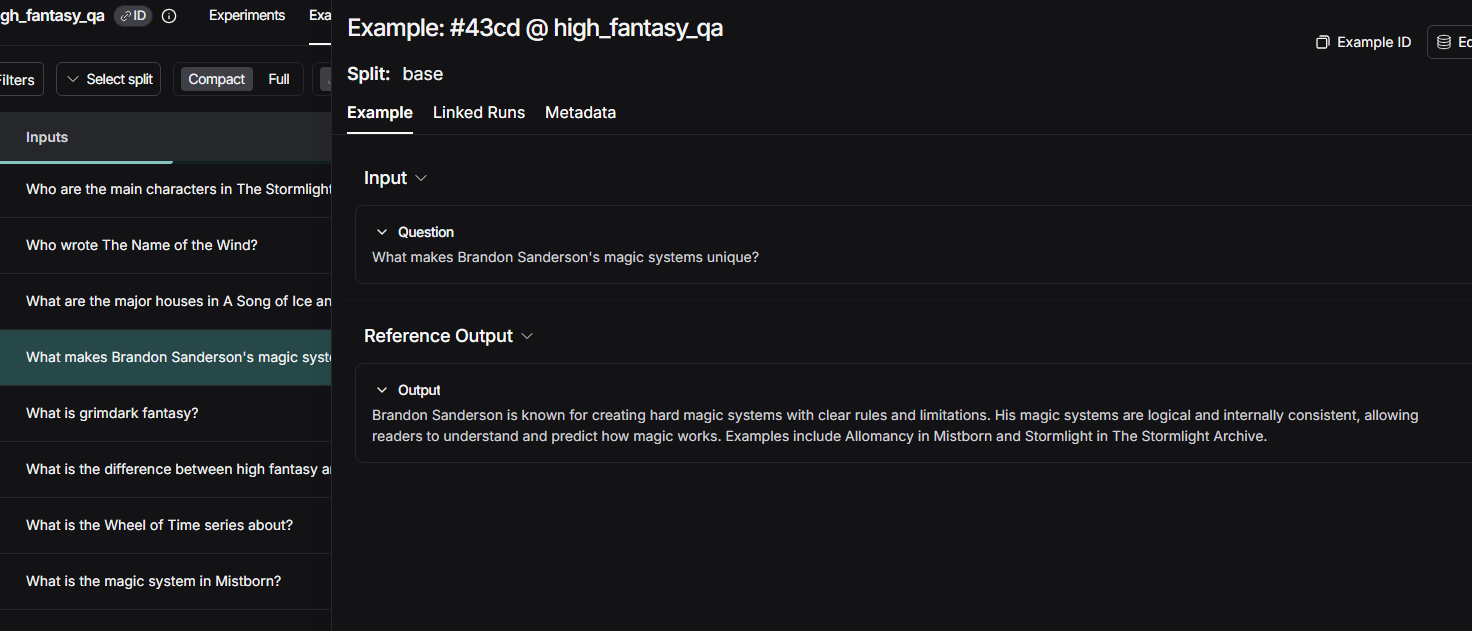